In [46]:
import sys
!{sys.executable} -m pip install pandas numpy sklearn matlablib

In [59]:
import numpy as np
import pandas as pd
import random
import csv
import statistics
import matplotlib.pyplot as pt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [68]:
#Data is loaded in from the iris.data file
dataset = pd.read_csv('iris.data' , sep=',')
X = dataset.iloc[:, 0:4]
y = dataset.iloc[:, -1]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.67, random_state = 3)

In [74]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.96

In [82]:
from sklearn.model_selection import cross_val_score

#Average accuracy
new_knn = KNeighborsClassifier(n_neighbors = 3)
crossVal_scores = cross_val_score(new_knn, X_test, y_test, cv = 5)
avgAcc = round((statistics.mean(crossVal_scores) * 100) , 2)
print(avgAcc)

97.0


In [83]:
scores = []
#Loop to test Accuracy of Model 
for k in range(1, 11):
    avg = 0
    for x in range(1 , 6):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.67, random_state = 3)
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        avg = avg + (metrics.accuracy_score(y_test, y_pred))
    scores.append(round(((avg / 5) * 100),3))
print(scores)

[96.0, 94.0, 96.0, 94.0, 96.0, 95.0, 97.0, 96.0, 98.0, 95.0]


Text(0, 0.5, 'Accuracy')

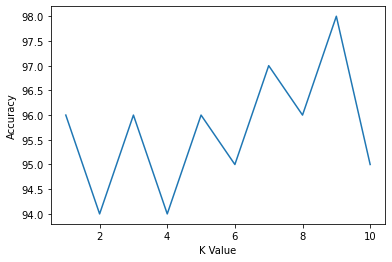

In [84]:
#Accuracy and K plot
%matplotlib inline
pt.plot(k_list,scores)
pt.xlabel('K Value')
pt.ylabel('Accuracy')